In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `~/Documents/programming/BME-574-2024`


In [2]:
Pkg.add(["Plots","ModelingToolkit","OrdinaryDiffEq","Lux","ADTypes","Optimisers","MLUtils","Zygote"])

    Updating registry at `~/.julia/registries/JSMLComponents.toml`
    Updating registry at `~/.julia/registries/JuliaComputingRegistry.toml`
    Updating registry at `~/.julia/registries/JuliaHubRegistry.toml`
   Resolving package versions...
  No Changes to `~/Documents/programming/BME-574-2024/Project.toml`
  No Changes to `~/Documents/programming/BME-574-2024/Manifest.toml`
Precompiling project...
  ✓ DifferentiationInterface → DifferentiationInterfaceZygoteExt
  ✓ Zygote → ZygoteDistancesExt
  ✓ SparseDiffTools
  ✓ SparseDiffTools → SparseDiffToolsPolyesterExt
  ✓ SparseDiffTools → SparseDiffToolsZygoteExt
  ✓ SciMLBase
  ✓ SciMLBase → SciMLBaseChainRulesCoreExt
  ✓ SciMLBase → SciMLBaseZygoteExt
  ✓ SciMLBase → SciMLBaseMakieExt
  ✓ DiffEqBase
  ✓ DiffEqBase → DiffEqBaseSparseArraysExt
  ✓ DiffEqBase → DiffEqBaseDistributionsExt
  ✓ DiffEqBase → DiffEqBaseChainRulesCoreExt
  ✓ DiffEqBase → DiffEqBaseUnitfulExt
  ✓ JumpProcesses
  ✓ DiffEqNoiseProcess
  ✓ OrdinaryDiffEqCore
  ✓ Or

In [3]:
using Plots, ModelingToolkit, OrdinaryDiffEq, Random, Lux, ADTypes, Optimisers, Zygote, Printf, MLUtils

[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]


In [4]:
using ModelingToolkit: t_nounits as t, D_nounits as D

In [5]:
@mtkmodel Lorenz begin
    @parameters begin
        σ = 10.0
        ρ = 26.0
        β = 8/3
    end
    @variables begin
        x(t) = 1.0 # dependent variables
        y(t) = 0.0
        z(t) = 0.0
    end
    @equations begin
        D(x) ~ σ * (y - x)
        D(y) ~ x * (ρ - z) - y
        D(z) ~ x * y - β * z
    end
end

ModelingToolkit.Model{typeof(__Lorenz__), Dict{Symbol, Any}}(__Lorenz__, Dict{Symbol, Any}(:variables => Dict{Symbol, Dict{Symbol, Any}}(:y => Dict(:default => 0.0, :type => Real), :z => Dict(:default => 0.0, :type => Real), :x => Dict(:default => 1.0, :type => Real)), :kwargs => Dict{Symbol, Dict}(:ρ => Dict{Symbol, Any}(:value => 26.0, :type => Real), :σ => Dict{Symbol, Any}(:value => 10.0, :type => Real), :y => Dict{Symbol, Any}(:value => 0.0, :type => Real), :z => Dict{Symbol, Any}(:value => 0.0, :type => Real), :β => Dict{Symbol, Any}(:value => :(8 / 3), :type => Real), :x => Dict{Symbol, Any}(:value => 1.0, :type => Real)), :independent_variable => :t, :parameters => Dict{Symbol, Dict{Symbol, Any}}(:ρ => Dict(:default => 26.0, :type => Real), :σ => Dict(:default => 10.0, :type => Real), :β => Dict(:default => :(8 / 3), :type => Real)), :equations => Any["D(x) ~ σ * (y - x)", "D(x) ~ σ * (y - x)", "D(y) ~ x * (ρ - z) - y", "D(x) ~ σ * (y - x)", "D(y) ~ x * (ρ - z) - y", "D(z) ~ x 

In [6]:
@mtkbuild lorenz = Lorenz()
prob = ODEProblem(lorenz, [], (0.0, 100), [])
sol = solve(prob, Tsit5(); reltol=1e-10, abstol=1e-11)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 30953-element Vector{Float64}:
   0.0
   0.0009026540305243168
   0.0014894754347955224
   0.00235734406331401
   0.003187907717243731
   0.004153114505628712
   0.005153337107327233
   0.006234523636109482
   0.007364989932354748
   0.008554627019826056
   0.009792040981468603
   0.011077575646491002
   0.01240604364126476
   ⋮
  99.9660425986133
  99.9693947137519
  99.97275254895277
  99.9761171802697
  99.97948963487421
  99.98287090482602
  99.98626195780622
  99.98966375001183
  99.9930772350733
  99.99650337451352
  99.99994314532456
 100.0
u: 30953-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.9911193334455038, 0.02335366499446452, 1.0486234146015071e-5]
 [0.9855010572988786, 0.03841437282659366, 2.8368748643700336e-5]
 [0.9774129327747108, 0.060517064214950574, 7.039216238276344e-5]
 [0.9699160199272091, 0.08148352564865147, 0.0001275932312476106]
 [0.9614983925277145, 0.10562717755815398, 0.

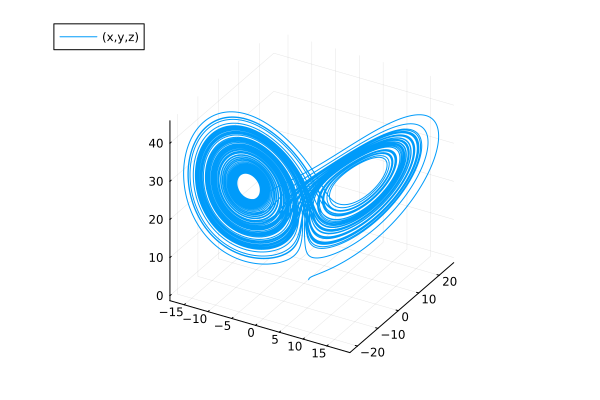

In [8]:
plot(sol, idxs = (1, 2, 3))

In [9]:
rng = MersenneTwister()
Random.seed!(rng, 12345)

MersenneTwister(12345)

In [10]:
sol_list = []
u0_list = []
for i in 1:100
    ric = 30*(rand(3).-0.5)
    new_prob = remake(prob, u0 = ric, tspan = (0,8))
    sol = solve(new_prob, Tsit5(); reltol=1e-10, abstol=1e-11, saveat=0.01)
    push!(sol_list, sol)
    push!(u0_list,ric)
end

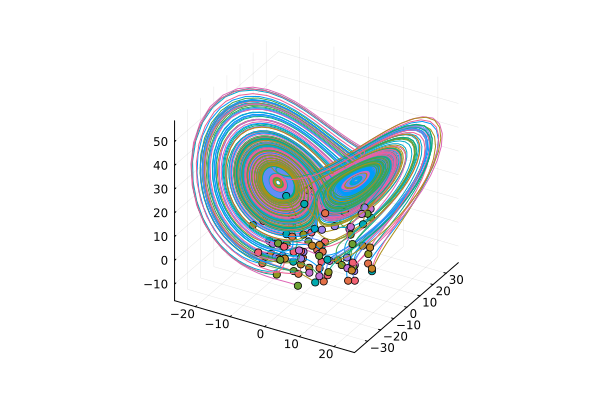

In [11]:
p = plot(sol_list[1],idxs = (1, 2, 3), legend=nothing)
scatter!(p, sol_list[1][1:1], idxs = (1,2,3))
for i in 2:100
    plot!(p, sol_list[i],idxs = (1, 2, 3))
    scatter!(p,sol_list[i][1:1], idxs = (1,2,3))
end
p

In [12]:
sol_array = Array(sol_list[1])
input = sol_array[:,1:end-1]
output = sol_array[:,2:end]
for i in 2:100
    sol_array = Array(sol_list[i])
    input = hcat(sol_array[:,1:end-1],input)
    output = hcat(sol_array[:,2:end],output)
end

In [13]:
input = Float32.(input)

3×80000 Matrix{Float32}:
 11.2852   11.3699   11.7323    12.3328   …  -3.79296  -4.11002  -4.45465
 10.5939   13.6764   16.6085    19.4069      -6.83197  -7.41533  -8.04514
 -3.04033  -1.60429   0.163758   2.29803      9.41426   9.44425   9.52234

In [14]:
output = Float32.(output)

3×80000 Matrix{Float32}:
 11.3699   11.7323    12.3328   13.1354   …  -4.11002  -4.45465  -4.82873
 13.6764   16.6085    19.4069   22.055       -7.41533  -8.04514  -8.72286
 -1.60429   0.163758   2.29803   4.84406      9.44425   9.52234   9.65574

In [17]:
# Process images into (H, W, C, BS) batches
i_data = Float32.(reshape(input, size(input, 1), 1, size(input, 2)))
o_data = Float32.(reshape(output, size(output, 1), 1, size(output, 2)))
(i_train, o_train), (i_test, o_test) = splitobs((i_data, o_data); at=0.9)
train_dataloader = DataLoader(collect.((i_train, o_train)); batchsize=128, shuffle=true)
test_dataloader = DataLoader(collect.((i_test, o_test)); batchsize=128, shuffle=true)

63-element DataLoader(::Tuple{Array{Float32, 3}, Array{Float32, 3}}, shuffle=true, batchsize=128)
  with first element:
  (3×1×128 Array{Float32, 3}, 3×1×128 Array{Float32, 3},)

In [18]:
model = Chain(Dense(3 => 10, sigmoid), Dense(10 => 10, relu), Dense(10 => 10), Dense(10 => 3))

Chain(
    layer_1 = Dense(3 => 10, σ),        # 40 parameters
    layer_2 = Dense(10 => 10, relu),    # 110 parameters
    layer_3 = Dense(10 => 10),          # 110 parameters
    layer_4 = Dense(10 => 3),           # 33 parameters
)         # Total: 293 parameters,
          #        plus 0 states.

In [107]:
opt = Adam()

Adam(0.001, (0.9, 0.999), 1.0e-8)

In [108]:
const loss_function = MSELoss()

(::GenericLossFunction{typeof(Lux.LossFunctionImpl.l2_distance_loss), typeof(Statistics.mean)}) (generic function with 2 methods)

In [109]:
ps, st = Lux.setup(rng, model)

((layer_1 = (weight = Float32[0.45480394 -0.59580064 0.8991058; 0.28601432 -0.42188287 -0.79081345; … ; 0.15095925 -0.7240832 -0.8909905; -0.55114317 -0.11432743 0.22707915], bias = Float32[0.15634115, -0.016184459, 0.26068145, 0.156281, -0.1592493, 0.07180456, 0.403456, -0.1573288, 0.1112753, -0.111088924]), layer_2 = (weight = Float32[-0.6371489 0.48947567 … 0.3820298 0.14008614; 0.5525929 0.069511056 … 0.2567841 -0.4949227; … ; 0.34998968 1.005799 … -0.35320553 0.30357456; -0.36099768 0.25140312 … 0.52942127 -0.22980897], bias = Float32[-0.17811425, 0.0071848766, -0.13857855, 0.2792143, 0.0373752, -0.07556753, -0.06826202, -0.11092359, 0.10921643, 0.18129003]), layer_3 = (weight = Float32[-0.02177764 0.011294228 … 0.4365173 0.22340679; 0.29562217 -0.16426776 … -0.38010246 -0.32763526; … ; 0.2287862 0.3659809 … 0.20469704 0.3638194; -0.20301573 0.015717348 … -0.2357042 -0.46141782], bias = Float32[0.10556809, 0.23729402, 0.08621867, -0.2875057, 0.24442077, 0.08063623, 0.25919065, -0.

In [110]:
tstate = Training.TrainState(model, ps, st, opt)

TrainState
    model: Chain{@NamedTuple{layer_1::Dense{typeof(σ), Int64, Int64, Nothing, Nothing, Static.True}, layer_2::Dense{typeof(relu), Int64, Int64, Nothing, Nothing, Static.True}, layer_3::Dense{typeof(identity), Int64, Int64, Nothing, Nothing, Static.True}, layer_4::Dense{typeof(identity), Int64, Int64, Nothing, Nothing, Static.True}}, Nothing}((layer_1 = Dense(3 => 10, σ), layer_2 = Dense(10 => 10, relu), layer_3 = Dense(10 => 10), layer_4 = Dense(10 => 3)), nothing)
    # of parameters: 293
    # of states: 0
    optimizer: Adam(0.001, (0.9, 0.999), 1.0e-8)
    step: 0

In [111]:
vjp_rule = AutoZygote()

AutoZygote()

In [112]:
function main(tstate::Training.TrainState, vjp, data, epochs)
    loss = 100.0
    best_tstate = nothing
    for epoch in 1:epochs
        for (x,y) in train_dataloader
            _, l, _, tstate = Training.single_train_step!(vjp, loss_function, (x,y), tstate)
            if l<loss
                loss = l
                best_tstate = tstate
            end
        end
        if epoch % 50 == 1 || epoch == epochs
            @printf "Epoch: %3d \t Loss: %.5g\n" epoch loss
        end
    end
    return best_tstate
end

tstate = main(tstate, vjp_rule, (input, output), 50000)
y_pred = Lux.apply(tstate.model, input, tstate.parameters, tstate.states)[1]

Epoch:   1 	 Loss: 10.564
Epoch:  51 	 Loss: 0.0016943
Epoch: 101 	 Loss: 0.0009433
Epoch: 151 	 Loss: 0.00057513
Epoch: 201 	 Loss: 0.00045974
Epoch: 251 	 Loss: 0.00037812
Epoch: 301 	 Loss: 0.00029057
Epoch: 351 	 Loss: 0.00025114
Epoch: 401 	 Loss: 0.00025114
Epoch: 451 	 Loss: 0.00025114
Epoch: 501 	 Loss: 0.00025114
Epoch: 551 	 Loss: 0.00025114
Epoch: 601 	 Loss: 0.00025114
Epoch: 651 	 Loss: 0.00023574
Epoch: 701 	 Loss: 0.00023574
Epoch: 751 	 Loss: 0.00023574
Epoch: 801 	 Loss: 0.00023574
Epoch: 851 	 Loss: 0.00023574
Epoch: 901 	 Loss: 0.00023574
Epoch: 951 	 Loss: 0.00023574
Epoch: 1001 	 Loss: 0.00023574
Epoch: 1051 	 Loss: 0.00023574
Epoch: 1101 	 Loss: 0.00018367
Epoch: 1151 	 Loss: 0.00018367
Epoch: 1201 	 Loss: 0.00018367
Epoch: 1251 	 Loss: 0.00018367
Epoch: 1301 	 Loss: 0.00018367
Epoch: 1351 	 Loss: 0.00018367
Epoch: 1401 	 Loss: 0.00018367
Epoch: 1451 	 Loss: 0.00018367
Epoch: 1501 	 Loss: 0.00018367
Epoch: 1551 	 Loss: 0.00017983
Epoch: 1601 	 Loss: 0.00017983
Epo

3×80000 Matrix{Float32}:
 11.3915  11.7658    12.373    13.1784   …  -4.11178  -4.45774  -4.83329
 13.8114  16.7028    19.4648   22.0828      -7.41833  -8.05044  -8.73084
 -1.683    0.116007   2.30495   4.92427      9.46677   9.54581   9.68014

In [113]:
lorenz_predict = [30*(rand(3).-0.5)]
for i in 1:800
    push!(lorenz_predict,Lux.apply(tstate.model, lorenz_predict[end], tstate.parameters, tstate.states)[1])
end

In [114]:
lorenz_predict[1]

3-element Vector{Float64}:
  6.342811198782328
  8.269067742002006
 13.714142056284132

In [115]:
lp = reduce(hcat,lorenz_predict)

3×801 Matrix{Float64}:
  6.34281   6.56734   6.8386    7.15272  …  -6.88847  -6.73971  -6.60572
  8.26907   8.96387   9.66555  10.3739      -5.36246  -5.35479  -5.36811
 13.7141   13.9      14.1493   14.4689      26.1046   25.7866   25.4706

In [91]:
new_sol[:,1]

3-element Vector{Float64}:
 -4.273045411334598
 -2.2631016560804773
  6.417853944964634

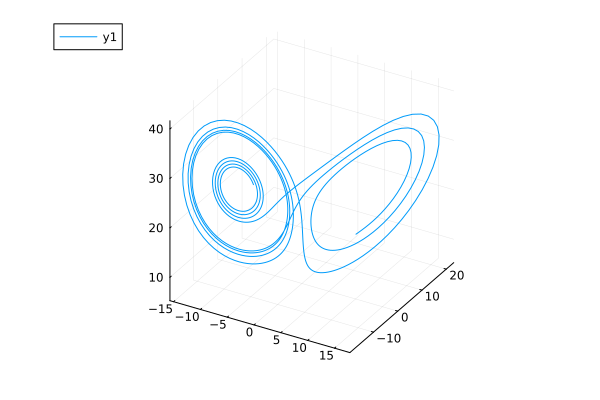

In [116]:
plot(lp[1,:],lp[2,:],lp[3,:])

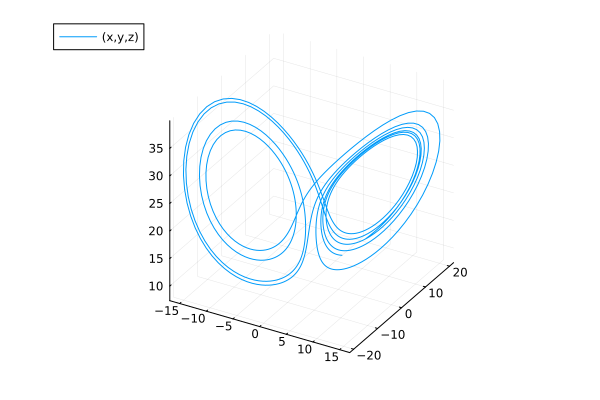

In [117]:
new_prob = remake(prob, u0 = lorenz_predict[1], tspan = (0,8))
new_sol = solve(new_prob, Tsit5(); reltol=1e-10, abstol=1e-11, saveat=0.01)
plot(new_sol, idxs=(1,2,3))

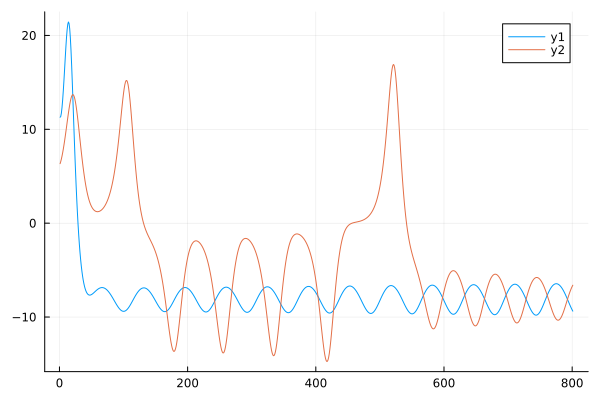

In [118]:
plot(sol[1,:])
plot!(lp[1,:])

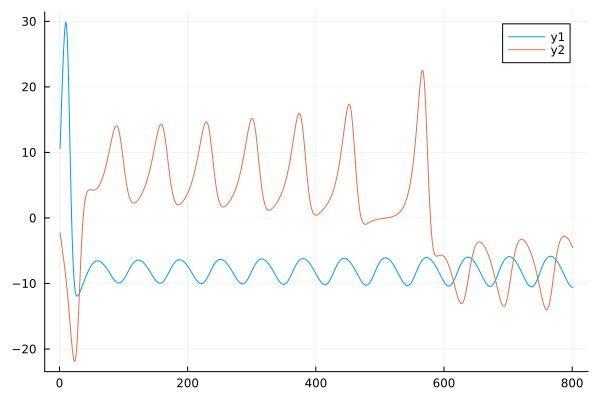

In [84]:
plot(sol[2,:])
plot!(lp[2,:])

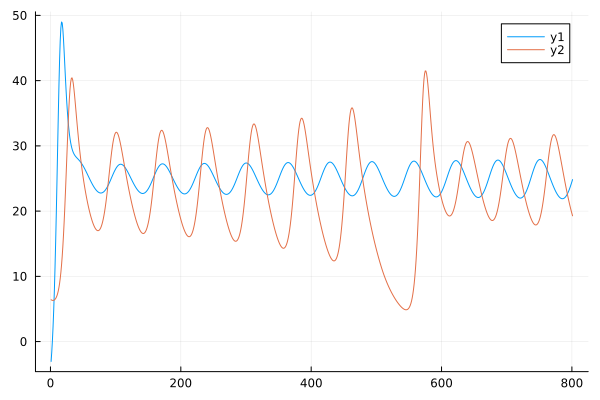

In [93]:
plot(sol[3,:])
plot!(lp[3,:])